## TO DO
* Reproduce age prediction
* Reduce data (sampling resolution + precision)
* Reproduce again
* Clean up code

### reproducing CNP_func_preprocess_corr_matrix
https://github.com/danielmlow/brain_age/blob/master/CNP_func_preprocess_corr_matrix.ipynb

In [5]:
import pandas as pd
import numpy as np
import nibabel as nib
import datetime
import os
from glob import glob

In [129]:
toy = False
run_all = True
path = '/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/'
output_dir = '/data1/users/jvogel/nilearn_tutorial/output/'
input_dir = '/data1/users/jvogel/nilearn_tutorial/'

n_jobs = 2 #amount of cores #orignally 20
cv=4
description = 'CNP_func_gridsearch_age_'
log_file = description+datetime.datetime.now().strftime("%y-%m-%d-%H-%M-%S")

In [130]:
log_file

'CNP_func_gridsearch_age_18-09-21-16-57-18'

In [131]:
# Load subject ids
scandirs = sorted(glob(os.path.join(path,'*/')))
subids = [x.split('/')[-2] for x in scandirs]
subids

['sub-10159',
 'sub-10171',
 'sub-10189',
 'sub-10193',
 'sub-10206',
 'sub-10217',
 'sub-10225',
 'sub-10227',
 'sub-10228',
 'sub-10235',
 'sub-10249',
 'sub-10269',
 'sub-10271',
 'sub-10273',
 'sub-10274',
 'sub-10280',
 'sub-10290',
 'sub-10292',
 'sub-10304',
 'sub-10316',
 'sub-10321',
 'sub-10325',
 'sub-10329',
 'sub-10339',
 'sub-10340',
 'sub-10345',
 'sub-10347',
 'sub-10356',
 'sub-10361',
 'sub-10365',
 'sub-10376',
 'sub-10377',
 'sub-10388',
 'sub-10429',
 'sub-10438',
 'sub-10440',
 'sub-10448',
 'sub-10455',
 'sub-10460',
 'sub-10471',
 'sub-10478',
 'sub-10487',
 'sub-10492',
 'sub-10506',
 'sub-10517',
 'sub-10523',
 'sub-10524',
 'sub-10525',
 'sub-10527',
 'sub-10530',
 'sub-10557',
 'sub-10565',
 'sub-10570',
 'sub-10575',
 'sub-10624',
 'sub-10629',
 'sub-10631',
 'sub-10638',
 'sub-10668',
 'sub-10672',
 'sub-10674',
 'sub-10678',
 'sub-10680',
 'sub-10686',
 'sub-10692',
 'sub-10696',
 'sub-10697',
 'sub-10704',
 'sub-10707',
 'sub-10708',
 'sub-10719',
 'sub-

In [132]:
len(subids)

265

Okay that's weird.. seems we have about 100 more subjects than they do...
Later on they do a train-test split -- could they have already left out 100 subjects before this notebook? 
Need to check this.

Okay figured it out. They are using only controls. Need to separate the controls...

In [133]:
df = pd.read_csv('/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.4/participants.tsv',
                    sep = '\t')
df.head()

,participant_id,diagnosis,age,gender,bart,bht,dwi,pamenc,pamret,rest,scap,stopsignal,T1w,taskswitch,ScannerSerialNumber
0,sub-10159,CONTROL,30,F,1,n/a,1,n/a,n/a,1,1,1,1,1,35343.0
1,sub-10171,CONTROL,24,M,1,1,1,n/a,n/a,1,1,1,1,1,35343.0
2,sub-10189,CONTROL,49,M,1,n/a,1,n/a,n/a,1,1,1,1,1,35343.0
3,sub-10193,CONTROL,40,M,1,n/a,1,n/a,n/a,n/a,n/a,n/a,1,n/a,35343.0
4,sub-10206,CONTROL,21,M,1,n/a,1,n/a,n/a,1,1,1,1,1,35343.0


In [134]:
control_ids = df[df.diagnosis=='CONTROL']['participant_id'].values

In [135]:
len(control_ids)

130

still a disparity but at least we're a lot closer now...

In [136]:
y_age = df.loc[df.participant_id.isin(control_ids),'age'].values
y_age

array([30, 24, 49, 40, 21, 33, 35, 31, 40, 22, 28, 38, 41, 30, 43, 27, 48,
       49, 25, 23, 29, 34, 29, 22, 45, 32, 25, 25, 43, 42, 24, 42, 49, 50,
       25, 36, 25, 26, 37, 25, 40, 30, 21, 31, 22, 21, 25, 21, 24, 46, 24,
       24, 23, 26, 25, 32, 23, 28, 31, 21, 25, 25, 29, 42, 24, 22, 26, 28,
       25, 39, 32, 28, 25, 23, 22, 23, 41, 38, 36, 35, 26, 47, 41, 23, 23,
       21, 25, 44, 37, 25, 22, 27, 30, 45, 24, 27, 32, 47, 26, 49, 47, 40,
       40, 48, 26, 22, 45, 49, 37, 23, 39, 22, 25, 21, 24, 43, 39, 21, 27,
       27, 21, 29, 25, 40, 28, 38, 24, 28, 32, 25])

In [137]:
confounds[0]

'/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10159/func/sub-10159_task-rest_bold_confounds.tsv'

In [138]:
filenames = sorted(glob(os.path.join(path,'sub-*/func/*MNI*preproc.nii.gz')))
filenames = [x for x in filenames if x.split('/')[-1].split('_')[0] in control_ids]
confounds = sorted(glob(os.path.join(path,'sub-*/func/*confounds.tsv')))
confounds = [x for x in confounds if x.split('/')[-1].split('_')[0] in control_ids]
print(len(filenames), len(confounds))

122 122


Bingo

Need to clean up the disparity between y_age and filenames

In [139]:
good_ids = [x.split('/')[-1].split('_')[0] for x in filenames if x.split('/')[-1].split('_')[0] in subj]
extras = [x for x in control_ids if x not in good_ids]
sorted(extras)

['sub-10193',
 'sub-10299',
 'sub-10428',
 'sub-10501',
 'sub-10948',
 'sub-10971',
 'sub-11082',
 'sub-11121']

In [140]:
jnk = control_ids.tolist()
[jnk.remove(x) for x in extras]
final_ids = jnk
len(final_ids)

122

In [141]:
y_age = df.loc[df.participant_id.isin(final_ids),'age'].values
y_age

array([30, 24, 49, 21, 33, 35, 31, 40, 22, 28, 38, 41, 30, 43, 27, 48, 49,
       23, 29, 34, 29, 22, 45, 32, 25, 25, 43, 42, 24, 42, 49, 50, 36, 25,
       26, 37, 25, 40, 30, 21, 31, 22, 25, 21, 24, 46, 24, 24, 23, 26, 25,
       32, 23, 28, 31, 21, 25, 25, 29, 42, 24, 22, 26, 28, 25, 39, 32, 28,
       25, 23, 22, 23, 41, 38, 36, 35, 26, 47, 41, 23, 23, 21, 25, 44, 37,
       25, 27, 30, 45, 24, 32, 47, 26, 49, 47, 40, 40, 48, 26, 22, 45, 49,
       37, 23, 39, 22, 21, 24, 43, 39, 21, 27, 27, 21, 29, 40, 28, 38, 24,
       28, 32, 25])

In [159]:
len(y_age[84:])

38

In [142]:
from nilearn import datasets

parcellations = datasets.fetch_atlas_basc_multiscale_2015(version='sym')

# We show here networks of 64, 197, 444
networks_64 = parcellations['scale064']
networks_197 = parcellations['scale197']
networks_444 = parcellations['scale444']

In [143]:
output_dir

'/data1/users/jvogel/nilearn_tutorial/output/'

In [144]:
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure, sym_matrix_to_vec

def func_2_corr_matrix(parcellation, name):
    masker = NiftiLabelsMasker(labels_img=parcellation, standardize=True,
                               memory='nilearn_cache', verbose=0)
    #n_regions = 197
    
    correlations = []
    upper_triang_corrs = []
    # Initializing ConnectivityMeasure object with kind='correlation'
    connectome_measure = ConnectivityMeasure(kind='correlation')
    for filename in filenames:
        timeseries_each_subject = masker.fit_transform(filename)
        # call fit_transform from ConnectivityMeasure object
        correlation = connectome_measure.fit_transform([timeseries_each_subject])
        # saving each subject correlation to correlations
        correlations.append(correlation)
        # get the upper triangular correlation matrix of correlation
        upper_triang_corr = sym_matrix_to_vec(correlation, discard_diagonal=True)
        # saving each subject upper_triang_corr to upper_triang_corrs
        upper_triang_corrs.append(upper_triang_corr) 
        print(filename,'finished')
    #   Split train test sets and save
    X_train = upper_triang_corrs[:84]
    X_test = upper_triang_corrs[84:]
    y_train = y_age[:84]
    y_test = y_age[84:]
    random_subj_train = subj[:84]
    random_subj_test = subj[84:]
    np.savez_compressed(output_dir+log_file+'CNP_func'+name+'_train_set',a=X_train, b=y_train, c=random_subj_train)
    np.savez_compressed(output_dir+log_file+'CNP_func'+name+'_test_set',a=X_test, b=y_test, c=random_subj_test)
    return correlations, upper_triang_corrs

#correlations197, upper_triang_corrs197 = func_2_corr_matrix(networks_197, '197')
correlations444, upper_triang_corrs444 = func_2_corr_matrix(networks_444, '444')

/home/users/jvogel/anaconda2/envs/py3/lib/python3.6/site-packages/scipy/ndimage/interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10159/func/sub-10159_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10171/func/sub-10171_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10189/func/sub-10189_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10206/func/sub-10206_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10217/func/sub-10217_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10225/func/sub-10225_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvo

/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10565/func/sub-10565_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10570/func/sub-10570_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10575/func/sub-10575_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10624/func/sub-10624_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10629/func/sub-10629_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-10631/func/sub-10631_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvo

/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-11061/func/sub-11061_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-11062/func/sub-11062_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-11066/func/sub-11066_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-11067/func/sub-11067_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-11068/func/sub-11068_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/sub-11077/func/sub-11077_task-rest_bold_space-MNI152NLin2009cAsym_preproc.nii.gz finished
/data1/users/jvo

### reproducing CNP_func_validation_age.ipynb (skipping grid search)
https://github.com/danielmlow/brain_age/blob/master/CNP_func_validation_age.ipynb

In [84]:
import pandas as pd
import numpy as np
import nibabel as nib
from sklearn.svm import LinearSVR
# from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from nilearn.input_data import NiftiMasker
import random
import matplotlib.pyplot as plt
import datetime

In [145]:
toy = False
run_all = False



#AWS cloud
# path = '/home/ubuntu/fmriprep/'
# output_dir = '/output/' 

#For Daniel's computer
# input_dir = 'data/CNP_func/'
# output_dir = 'data/CNP_T1/' 

#For Jake's computer
path = '/data1/users/jvogel/nilearn_tutorial/ds000030_R1.0.5/derivatives/fmriprep/'
output_dir = '/data1/users/jvogel/nilearn_tutorial/output/'

n_jobs = 2 #amount of cores
cv=4

parcellation = '444'

description = 'CNP_func_validation_age_'
log_file = description+datetime.datetime.now().strftime("%y-%m-%d-%H-%M-%S")

In [146]:
loaded = np.load(os.path.join(output_dir,'CNP_func_gridsearch_age_18-09-21-16-57-18CNP_func%s_train_set.npz'%(
                                                                                                parcellation)))
X_train, y_train, random_subj_train = loaded['a'], loaded['b'], loaded['c']


In [147]:
print(y_train.shape)
print(X_train.shape)
X_train = np.reshape(X_train, (84, X_train.shape[2]))

(84,)
(84, 1, 98346)


In [148]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.30, random_state=42)

## Validation

Grid search returned the best parameters:

* ANOVA k selection: 'all'
* C parameter of SVR: 1



In [149]:
X_train.shape

(58, 98346)

In [150]:
from sklearn.pipeline import Pipeline

if toy:
    X_train = X_train[:8]
    y_train = y_train[:8]
    X_validation = X_validation[:8]
    y_validation = y_validation[:8]


# Remove features with too low between-subject variance
# Here we use a classical univariate feature selection based on F-test,
# namely Anova.
# We have our predictor (SVR), our feature selection (SelectKBest), and now,
# we can plug them together in a *pipeline* that performs the two operations
# successively:
               
anova_svr = Pipeline([
            ('anova', SelectKBest(f_regression, k='all')),
            ('svr', LinearSVR(C=1.))])

# parameters = [{'anova__k': [2000],
#                'svr__C': [0.1,1]}]


anova_svr.fit(X_train, y_train)
predictions = anova_svr.predict(X_validation)

# clf = SVR(kernel='linear', C=0.01)
# clf.fit(X_train, y_train)
# predictions = clf.predict(X_validation)



score = mean_absolute_error(y_validation, predictions)
r2 = r2_score(y_validation, predictions)
# mean_scores = np.array(grid.cv_results_['neg_mean_absolute_error'])
# mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# # select score for best C
# mean_scores = mean_scores.max(axis=0)
# bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
#                (len(reducer_labels) + 1) + .5)

In [151]:
print(score)
print(predictions)
print(y_validation)

7.78864872315
[ 26.26168803  38.66250636  31.24152322  23.1195063   23.58577952
  25.43173013  25.97281     45.78965701  29.27291778  36.62519819
  39.4060272   30.28851133  35.02458125  22.55522122  21.50435095
  40.02839508  34.12155851  37.74734418  33.68356508  33.3873856
  42.67267218  26.84710329  25.9889852   29.88908515  28.83029142
  37.98564133]
[38 30 29 45 30 22 38 29 33 39 31 24 37 21 21 31 25 26 25 26 41 49 21 24 28
 25]


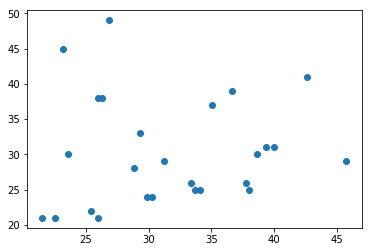

In [152]:
plt.close()
plt.scatter(predictions,y_validation)
plt.show()

In [153]:
print(r2)

-0.683691046959


## Test

In [160]:
loaded = np.load(os.path.join(output_dir,'CNP_func_gridsearch_age_18-09-21-16-57-18CNP_func%s_train_set.npz'%(
                                                                                                parcellation)))
X_train, y_train, random_subj_train = loaded['a'], loaded['b'], loaded['c']


In [161]:
loaded = np.load(os.path.join(output_dir,'CNP_func_gridsearch_age_18-09-21-16-57-18CNP_func%s_test_set.npz'%(
                                                                                                parcellation)))
X_test, y_test, random_subj_train = loaded['a'], loaded['b'], loaded['c']

In [162]:
print(y_train.shape)
print(X_train.shape)
X_train = np.reshape(X_train, (84, X_train.shape[2]))

(84,)
(84, 1, 98346)


In [125]:
84+38

122

In [164]:
print(y_test.shape)
print(X_test.shape)
X_test = np.reshape(X_test, (38, X_test.shape[2]))

(38,)
(38, 1, 98346)


In [168]:
len(y_validation)

26

In [169]:

if toy:
    X_train = X_train[:8]
    y_train = y_train[:8]
    X_validation = X_validation[:8]
    y_validation = y_validation[:8]


# Remove features with too low between-subject variance
# Here we use a classical univariate feature selection based on F-test,
# namely Anova.
# We have our predictor (SVR), our feature selection (SelectKBest), and now,
# we can plug them together in a *pipeline* that performs the two operations
# successively:
               
anova_svr = Pipeline([
            ('anova', SelectKBest(f_regression, k='all')),
            ('svr', LinearSVR(C=1.))])

# parameters = [{'anova__k': [2000],
#                'svr__C': [0.1,1]}]


anova_svr.fit(X_train, y_train)
predictions = anova_svr.predict(X_test)

# clf = SVR(kernel='linear', C=0.01)
# clf.fit(X_train, y_train)
# predictions = clf.predict(X_validation)



score = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
# mean_scores = np.array(grid.cv_results_['neg_mean_absolute_error'])
# mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# # select score for best C
# mean_scores = mean_scores.max(axis=0)
# bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
#                (len(reducer_labels) + 1) + .5)

In [170]:
print(score)
print(predictions)
print(y_validation)

9.91305557423
[ 31.82324201  36.12679173  41.16566273  29.66321453  45.74855501
  37.04535802  32.6433198   37.30542157  25.14901389  34.86758602
  17.06921335  28.55550092  31.95097511  31.54179703  36.60259643
  38.9816278   26.94376762  23.52582162  22.95307533  20.31035621
  29.52804224  30.13239225  38.19418082  21.14884666  24.00107104
  24.72496755  36.66706196  30.21627519  38.38783998  24.51511999
  29.72685165  27.38596759  24.64765743  27.56948594  32.04241612
  22.62742252  28.79021971  29.58272822]
[38 30 29 45 30 22 38 29 33 39 31 24 37 21 21 31 25 26 25 26 41 49 21 24 28
 25]


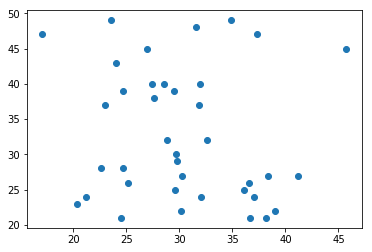

-0.735089967773


In [172]:
plt.close()
plt.scatter(predictions,y_test)
plt.show()
print(r2)